In [8]:
import rasterio as rio
import os
#Spectral Indices
band_1 = rio.open(r"G:\Manjar\github\rasterData\clipBands\LC08_L2SP_146040_20241018_20241028_02_T1_SR_B1_clipped.tif")
band_2 = rio.open(r"G:\Manjar\github\rasterData\clipBands\LC08_L2SP_146040_20241018_20241028_02_T1_SR_B2_clipped.tif")
band_3 = rio.open(r"G:\Manjar\github\rasterData\clipBands\LC08_L2SP_146040_20241018_20241028_02_T1_SR_B3_clipped.tif")
band_4 = rio.open(r"G:\Manjar\github\rasterData\clipBands\LC08_L2SP_146040_20241018_20241028_02_T1_SR_B4_clipped.tif")
band_5 = rio.open(r"G:\Manjar\github\rasterData\clipBands\LC08_L2SP_146040_20241018_20241028_02_T1_SR_B5_clipped.tif")
band_6 = rio.open(r"G:\Manjar\github\rasterData\clipBands\LC08_L2SP_146040_20241018_20241028_02_T1_SR_B6_clipped.tif")
band_7 = rio.open(r"G:\Manjar\github\rasterData\clipBands\LC08_L2SP_146040_20241018_20241028_02_T1_SR_B7_clipped.tif")
band_10 = rio.open(r"G:\Manjar\github\rasterData\clipBands\LC08_L2SP_146040_20241018_20241028_02_T1_ST_B10_clipped.tif")
## Read all bands and convert them to float(64 bit) types
aerosol_band = band_1.read(1).astype("float64")
blue_band = band_2.read(1).astype("float64")
green_band = band_3.read(1).astype("float64")
red_band = band_4.read(1).astype("float64")
nir_band = band_5.read(1).astype("float64")
swir_1_band = band_6.read(1).astype("float64")
swir_2_band = band_7.read(1).astype("float64")
thermal_band = band_10.read(1).astype("float64")

In [9]:
#Compute NDVI
#NDVI = ( (NIR - Red) / (NIR + Red) )

import numpy as np

np.seterr(all='ignore')

ndvi = np.where(
    (nir_band + red_band) == 0, 0,
    ((nir_band - red_band) / (nir_band + red_band))
)

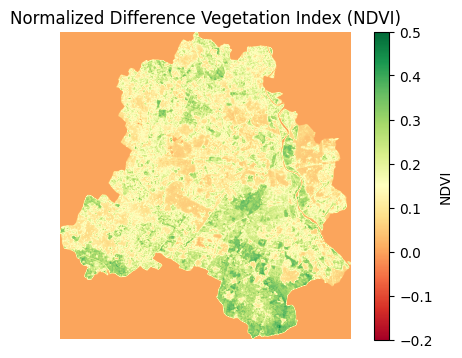

In [10]:
import numpy as np
import rasterio as rio
import matplotlib.pyplot as plt
# Plot NDVI
plt.figure(figsize=(6, 4))
ndvi_plot = plt.imshow(ndvi, cmap='RdYlGn', vmin=-0.2, vmax=0.5)  # Use a diverging colormap
plt.colorbar(ndvi_plot, label="NDVI")
plt.title("Normalized Difference Vegetation Index (NDVI)")
plt.axis('off')  # Turn off axis labels
plt.show()

In [11]:
# Get highest and lowest NDVI values
highest_ndvi = np.nanmax(ndvi)
lowest_ndvi = np.nanmin(ndvi)

# Print the results
print(f"Highest NDVI value: {highest_ndvi}")
print(f"Lowest NDVI value: {lowest_ndvi}")

Highest NDVI value: 0.4654394845835251
Lowest NDVI value: -0.10480421191181309


In [12]:
# Save generated NDVI
meta = band_1.meta.copy()
meta.update({
    "count": 1,
    "dtype": "float64"
})

spectral_indices_folder = r"G:\Manjar\github\rasterData\spectralIndices"
os.makedirs(spectral_indices_folder, exist_ok=True)

ndvi_file = os.path.join(spectral_indices_folder, "ndvi.tif")
with rio.open(ndvi_file, "w", ** meta) as dst:
    dst.write(ndvi, 1)

In [13]:
#Calculating NDWI
#NDWI = (Green - NIR) / (Green + NIR)

ndwi = np.where(
    (green_band + nir_band) == 0, 0,
    ((green_band - nir_band) / (green_band + nir_band))
)

# Save generated NDWI
meta = band_1.meta.copy()
meta.update({
    "count": 1,
    "dtype": "float64"
})


ndwi_file = os.path.join(spectral_indices_folder, "ndwi.tif")
with rio.open(ndwi_file, "w", ** meta) as dst:
    dst.write(ndwi, 1)

In [14]:
#Calculating NDBI
#NDBI = (SWIR - NIR) / (SWIR + NIR)

ndbi = np.where(
    (swir_1_band + nir_band) == 0, 0,
    ((swir_1_band - nir_band) / (swir_1_band + nir_band))
)

# Save generated NDBI
meta = band_1.meta.copy()
meta.update({
    "count": 1,
    "dtype": "float64"
})


ndbi_file = os.path.join(spectral_indices_folder, "ndbi.tif")
with rio.open(ndbi_file, "w", ** meta) as dst:
    dst.write(ndbi, 1)

In [15]:
#Calculating BAI
#Burn Area Index (BAI)
#BAI = 1 / ( (0.1 -RED)^2 + (0.06 - NIR)^2 )

bai = np.where(
    (red_band + nir_band) == 0, 0,
    1 / ((0.1 - red_band)**2 + (0.06 - nir_band)**2)
)

# Save generated BAI
meta = band_1.meta.copy()
meta.update({
    "count": 1,
    "dtype": "float64"
})


bai_file = os.path.join(spectral_indices_folder, "bai.tif")
with rio.open(bai_file, "w", ** meta) as dst:
    dst.write(bai, 1)